# Estudo do capítulo 8


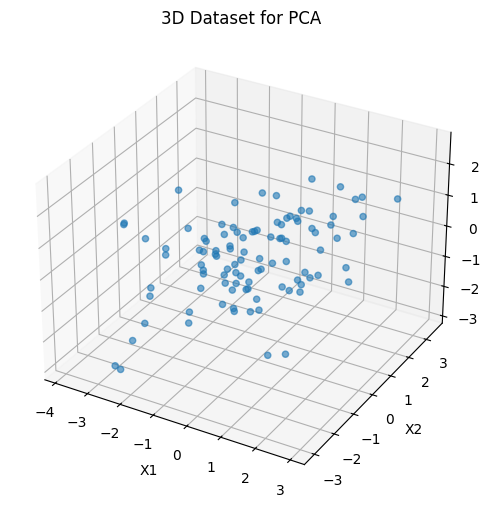

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seed for reproducibility
np.random.seed(42)

# Generate 3D data with some linear correlation
mean = [0, 0, 0]
cov = [[3, 1, 1], 
       [1, 2, 0.5], 
       [1, 0.5, 1]]  # Covariance matrix

# Generate 100 samples
X = np.random.multivariate_normal(mean, cov, 100)

# Plot the 3D data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.6)
ax.set_title("3D Dataset for PCA")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
plt.show()


In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0] 
c2 = Vt.T[:, 1]

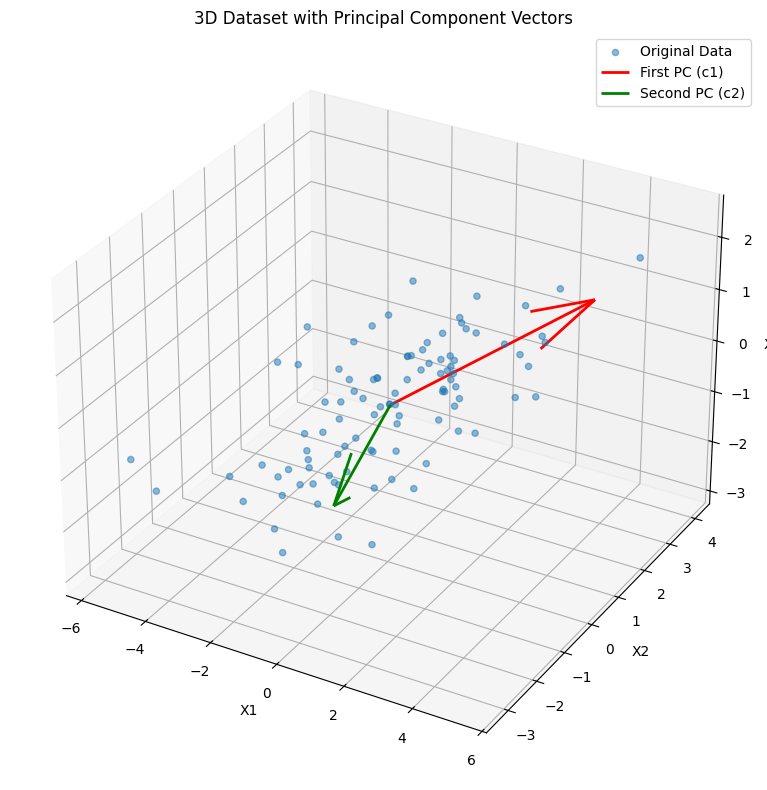

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seed and data generation
np.random.seed(12)
mean = [0, 0, 0]
cov = [[3, 1, 1], [1, 2, 0.5], [1, 0.5, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

# Center the data
X_centered = X - X.mean(axis=0)

# Compute SVD
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]  # First principal component
c2 = Vt.T[:, 1]  # Second principal component

# Origin for vector plotting
origin = X.mean(axis=0)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter the original data
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.5, label='Original Data')

# Plot the principal component vectors
scale = 5  # scale for visualization
ax.quiver(*origin, *(scale * c1), color='r', label='First PC (c1)', linewidth=2)
ax.quiver(*origin, *(scale * c2), color='g', label='Second PC (c2)', linewidth=2)

# Labels
ax.set_title("3D Dataset with Principal Component Vectors")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.legend()
plt.tight_layout()
plt.show()


In [28]:
W2 = Vt.T[:, :2] 
X2D = X_centered.dot(W2)

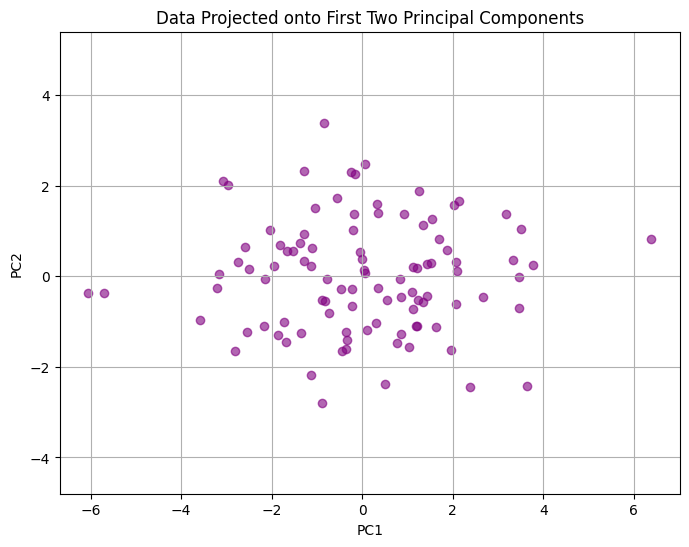

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X2D[:, 0], X2D[:, 1], alpha=0.6, color='purple')
plt.title("Data Projected onto First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axis('equal')
plt.show()

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D_sklearn = pca.fit_transform(X)

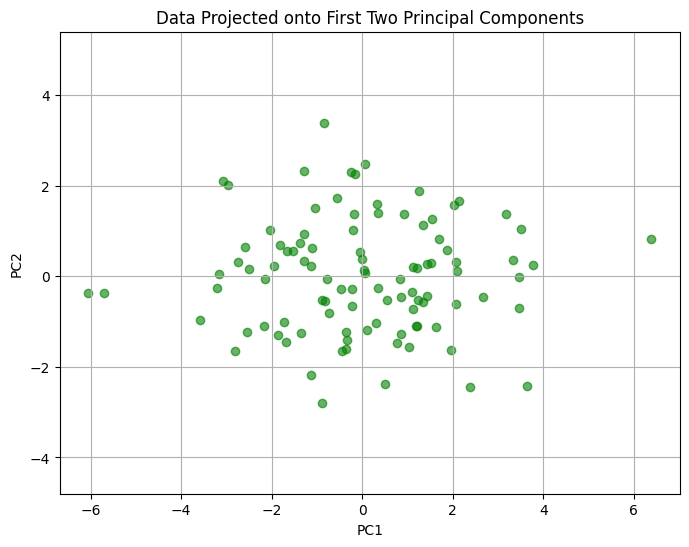

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(X2D_sklearn[:, 0], -X2D_sklearn[:, 1], alpha=0.6, color='green')
plt.title("Data Projected onto First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axis('equal')
plt.show()

In [42]:
pca.explained_variance_ratio_

array([0.66023923, 0.24179639])

In [43]:
sum(pca.explained_variance_ratio_)

np.float64(0.9020356190212055)

In [44]:
pca = PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1

d

np.int64(3)